In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# read the dataset into a dataframe
df = pd.read_csv('../data/cyberbullying_tweets.csv')

df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
# dataset shape: (rows, columns)
df.shape

(47692, 2)

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


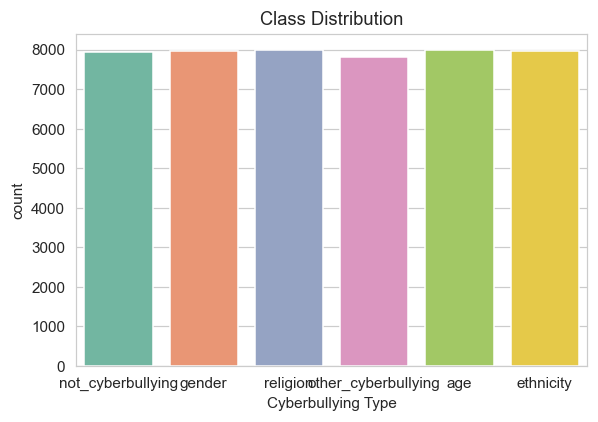

In [5]:
# class distribution
print(df['cyberbullying_type'].value_counts())

# plot the class distribution
plt.figure(dpi=110)
chart = sns.countplot(x="cyberbullying_type", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Cyberbullying Type')
plt.show()

In [6]:
# find duplicate sentences
df[df['tweet_text'].duplicated()]

,tweet_text,cyberbullying_type
1758,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
3833,But you all respect him....Pete hasn't read tw...,not_cyberbullying
3939,This is the opportunity to prove ourselves lik...,not_cyberbullying
5684,Strategicscoring should be classed as cheating...,not_cyberbullying
6975,"If we're at the bottom of the leaderboard, we'...",not_cyberbullying
...,...,...
45718,@SFtheWolf @max2000warlord people confuse empa...,ethnicity
46360,RT @AntonioFrench: I spent the morning at the ...,ethnicity
46556,"He can't be a server at our restaurant, that b...",ethnicity
46962,"Still, Davis, who is gay, said he pays a socia...",ethnicity


In [10]:
# extract indices of duplicate sentences
dup_indices = df[df['tweet_text'].duplicated()].index

dup_data = df[df['tweet_text'] == df['tweet_text'].loc[dup_indices[0]]]

# extract each set of duplicate sentences
for index in dup_indices[1:]:
    temp = df[df['tweet_text'] == df['tweet_text'].loc[index]]
    dup_data = pd.concat([dup_data, temp])

dup_data

,tweet_text,cyberbullying_type
829,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
1758,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
3406,But you all respect him....Pete hasn't read tw...,not_cyberbullying
3833,But you all respect him....Pete hasn't read tw...,not_cyberbullying
1712,This is the opportunity to prove ourselves lik...,not_cyberbullying
...,...,...
46556,"He can't be a server at our restaurant, that b...",ethnicity
41403,"Still, Davis, who is gay, said he pays a socia...",ethnicity
46962,"Still, Davis, who is gay, said he pays a socia...",ethnicity
46915,Racism won't stop as long as u stil select ur ...,ethnicity


In [11]:
# drop the duplicate sentences
df = df.drop(index=dup_indices)

# reset dataframe indices
df.reset_index()
    
# verify if duplicate sentences are dropped
df[df['tweet_text'].duplicated()]

,tweet_text,cyberbullying_type


In [12]:
# dataset shape after dropping duplicates
df.shape

(46017, 2)

religion               7995
age                    7992
ethnicity              7952
not_cyberbullying      7937
gender                 7898
other_cyberbullying    6243
Name: cyberbullying_type, dtype: int64


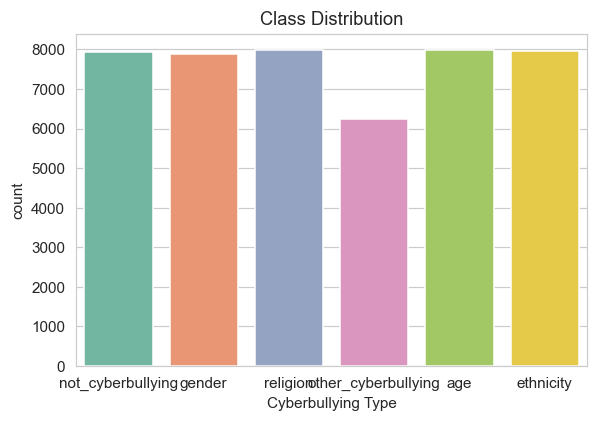

In [13]:
# class distribution after dropping duplicates
print(df['cyberbullying_type'].value_counts())

# plot the class distribution after droping duplicates
plt.figure(dpi=110)
chart = sns.countplot(x="cyberbullying_type", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Cyberbullying Type')
plt.show()

In [14]:
# check null value counts
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64